In [1]:
# import config
from config_ML import *

# import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import preprocessing modules
from sklearn.model_selection import train_test_split


# set options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

In [2]:
# load features and labels
raw_feat = pd.read_csv(f'{raw_data_dir}/gene_features_{creation_date}.csv')
pos_genes = pd.read_csv(f'{raw_data_dir}/positive_genes_{creation_date}.csv')
neg_genes = pd.read_csv(f'{raw_data_dir}/dispensible_genes_{creation_date}.csv')

# # load table with filling methods for missing values
filling_methods = pd.read_csv(f'{raw_data_dir}/fill_missing_methods_{creation_date}.csv', delimiter=";")

In [3]:
#### LABELS ####

# create new column indicating if a evidence_count > 1
pos_genes['ec2345'] = np.where(pos_genes['evidence_count'] > 1, 1, 0)

# filter only positive genes with evidence_count > 1
pos_genes = pos_genes.query("ec2345 == 1")

# set negative genes to ec2345 = 0 
neg_genes['ec2345'] = 0

# combine positive and negative genes
labels = pd.concat([neg_genes[['hgnc_id_int', 'ec2345']], pos_genes[['hgnc_id_int', 'ec2345']]])

# print out number of instances
print("Instances with ec2345 == 1: ", len(labels[labels['ec2345'] == 1]))
print("Instances with ec2345 == 0: ", len(labels[labels['ec2345'] == 0]))
print(labels.shape)

Instances with ec2345 == 1:  596
Instances with ec2345 == 0:  1380
(1976, 2)


In [4]:
# split labels into 80% training and 20% test set stratified by ec2345
train_ids, test_ids, _, _ = train_test_split(labels.drop(columns=['ec2345']), labels['ec2345'], test_size=0.2, stratify=labels['ec2345'], random_state=42)

print('shape train_ids: ', train_ids.shape)
print('shape test_ids: ', test_ids.shape)

train_ids_arr = train_ids['hgnc_id_int'].values
test_ids_arr = test_ids['hgnc_id_int'].values


# get training labels df
labels_train = labels[labels['hgnc_id_int'].isin(train_ids_arr)]

# get training features df
feat_train = raw_feat[raw_feat['hgnc_id_int'].isin(train_ids_arr)]

# get test labels df
labels_test = labels[labels['hgnc_id_int'].isin(test_ids_arr)]

# get test features df
feat_test = raw_feat[raw_feat['hgnc_id_int'].isin(test_ids_arr)]


print('shape labels_test: ', labels_test.shape)
print('shape labels_train: ', labels_train.shape)
print('shape feat_test: ', feat_test.shape)
print('shape feat_train: ', feat_train.shape)


# save training and test data
labels_train.to_csv(f'{train_test_data_dir}/labels_train_{data_prep_date}.csv', index=False)
labels_test.to_csv(f'{train_test_data_dir}/labels_test_{data_prep_date}.csv', index=False)
feat_train.to_csv(f'{train_test_data_dir}/feat_train_{data_prep_date}.csv', index=False)
feat_test.to_csv(f'{train_test_data_dir}/feat_test_{data_prep_date}.csv', index=False)


## create table with median values of training set for filling NA
# calculate the median for each column and create a new df
median_values_train = feat_train.drop(columns = ['hgnc_id_int']).median().reset_index()
median_values_train.columns = ['feature', 'median']


# save median df
median_values_train.to_csv(f'{train_test_data_dir}/median_values_train_{data_prep_date}.csv', index=False)

# Display the new DataFrame
print(median_values_train.head(3))


shape train_ids:  (1580, 1)
shape test_ids:  (396, 1)
shape labels_test:  (396, 2)
shape labels_train:  (1580, 2)
shape feat_test:  (390, 110)
shape feat_train:  (1533, 110)
         feature    median
0  CL_0000115_me  1.583693
1  CL_0000653_me  1.535891
2  CL_0002306_me  1.385320


In [5]:
#### END ####

In [6]:
feat_train['max_mgi_kid']

18      -1.0
20      -1.0
21      -1.0
22      -1.0
31       1.0
        ... 
18616    NaN
18617    NaN
18631    NaN
18646    NaN
18994    NaN
Name: max_mgi_kid, Length: 1533, dtype: float64

In [ ]:
### NOTES - TO BE DELETED ###

In [14]:
pd.DataFrame(grid_search.cv_results_)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.119668,0.004685,0.028040,0.001761,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.834629,0.852263,0.787678,0.757311,0.850259,0.816428,0.037633,4
1,0.127303,0.002507,0.027776,0.000700,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.772897,0.818446,0.795671,0.746283,0.828811,0.792422,0.030073,6
2,0.132323,0.004834,0.031432,0.000544,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.851795,0.849729,0.831628,0.816828,0.837139,0.837424,0.012774,3
3,0.118657,0.006572,0.027386,0.000778,1,0.001,rbf,"{'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}",0.875455,0.872110,0.866281,0.805140,0.867556,0.857309,0.026289,1
4,0.135160,0.004542,0.028158,0.002340,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.776242,0.816232,0.795721,0.743838,0.832123,0.792831,0.030904,5
5,0.135352,0.006206,0.031288,0.000878,1,auto,rbf,"{'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}",0.861141,0.859395,0.841466,0.811302,0.842328,0.843126,0.017919,2


In [ ]:
# # features and labels used for the ML process (training and test)
# train_test_features = labels_features.drop(columns = ['ec2345'])
# train_test_labels = labels_features['ec2345']

# print('shape train_test_features: ', train_test_features.shape)
# print('shape train_test_labels: ', train_test_labels.shape)
# train_test_features

In [253]:
feat_train_scaled.shape

(1545, 111)

In [259]:
# transform scaled training feature df, and label df into numpy arrays
X_train = feat_train_scaled.drop(columns=['hgnc_id_int']).values
X_train.shape
type(X_train)

numpy.ndarray

In [15]:


# Load the dataset (replace this with your dataset)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Define a parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 'scale', 'auto']
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')

# Fit the model with the best hyperparameters to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
accuracy = best_svm_classifier.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)


cv_results_df = pd.DataFrame(grid_search.cv_results_)

cv_results_df

ValueError: multiclass format is not supported

In [258]:
type(y_train)

numpy.ndarray

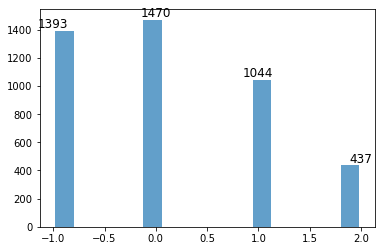

In [5]:
# set negative genes to evidence_group = -1
neg_genes['evidence_group'] = -1

# combine positive and negative genes
labels = pd.concat([neg_genes[['hgnc_id_int', 'evidence_group']], pos_genes[['hgnc_id_int', 'evidence_group']]])
labels.tail(100)

plt.hist(labels['evidence_group'], bins='auto', alpha=0.7, rwidth=0.85)
# Calculate and display the absolute count for each group
value_counts = labels['evidence_group'].value_counts().sort_index()
for x, count in zip(value_counts.index, value_counts):
    plt.text(x, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()




In [33]:
# TEST ORDINAL REGRESSION

# example dataset
url = "https://stats.idre.ucla.edu/stat/data/ologit.dta"
data_student = pd.read_stata(url)

data_student

mapping = {'very likely': 2, 'somewhat likely': 1, 'unlikely': 0}
data_student['apply_fac'] = data_student['apply'].map(mapping)
data_student.drop(columns=['apply'], inplace=True)
data_student.head(4)

,pared,public,gpa,apply_fac
0,0,0,3.26,2
1,1,0,3.21,1
2,1,1,3.94,0
3,0,0,2.81,1


In [52]:

#https://github.com/mosh98/Ordinal_Classifier/blob/master/Ordinal_Classifier.py

from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone, BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.utils.multiclass import check_classification_targets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

class OrdinalClassifier(BaseEstimator, ClassifierMixin):
    #https://towardsdatascience.com/simple-trick-to-train-an-ordinal-regression-with-any-classifier-6911183d2a3c
    """
    A classifier that can be trained on a range of classes.
    @param classifier: A scikit-learn classifier.
    """
    def __init__(self,clf):
        self.clf = clf
        self.clfs = {}
        self.uniques_class = None

    def fit(self,X,y):
        self.uniques_class = np.sort(np.unique(y))
        assert self.uniques_class.shape[0] >= 3, f'OrdinalClassifier needs at least 3 classes, only {self.uniques_class.shape[0]} found'

        for i in range(self.uniques_class.shape[0]-1):
            binary_y = (y > self.uniques_class[i]).astype(np.uint8)
            
            clf = clone(self.clf)
            clf.fit(X,binary_y)
            self.clfs[i] = clf

    def predict(self,X):
        return np.argmax( self.predict_proba(X), axis=1 )

    def predict_proba(self,X):
        predicted = [self.clfs[k].predict_proba(X)[:,1].reshape(-1,1) for k in self.clfs]

        p_x_first = 1-predicted[0]
        p_x_last  = predicted[-1]
        p_x_middle= [predicted[i] - predicted[i+1] for i in range(len(predicted) - 1)]
        
        probs = np.hstack([p_x_first, *p_x_middle, p_x_last])

        return probs

    def set_params(self, **params):
        self.clf.set_params(**params)
        for _,clf in self.clfs.items():
            clf.set_params(**params)



In [57]:
X_train = data_student.iloc[:300][['pared', 'public', 'gpa']]
y_train = data_student.iloc[:300][['apply_fac']].values
X_test = data_student.tail(100)[['pared', 'public', 'gpa']]



from sklearn.tree import DecisionTreeClassifier

clf = OrdinalClassifier(DecisionTreeClassifier())

clf.fit(X_train, y_train)
  
predictions = clf.predict(X_test)
pred_probailities = clf.predict_proba(X_test)



# TADA! You just became a regression master! 
# By exploting an unemployed engineer. Remember that when you sleep 


In [58]:
predictions

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0])

In [61]:
pred_probailities

array([[0.5       , 0.5       , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [0.5       , 0.        , 0.5       ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.75      , 0.25      , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.66666667, 0.33333333, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [1.

In [44]:
from sklearn.base import BaseEstimator
import numpy as np
class OrdClass(BaseEstimator):
    """
    Helper class that solves ordinal classification (classes that have an order to them eg cold,warm,hot)
    """
    def __init__(self,classifier=None,clf_args=None):
        """
        y needs to be a number that start from 0 and increments by 1
        classifier object needs to be able to return a probability
        """
        self.classifier = classifier
        self.clfs = []
        self.clf_args = clf_args
        self.final_prob = None
        
    def fit(self,X,y,**fit):
        self.X = X
        self.y = y
        import copy
        no_of_classifiers = np.max(self.y) #since y starts from 0
        print("no_of_classifiers: ", no_of_classifiers)
        self.classes_ = list(range(no_of_classifiers+1))
        
        c = None
        
        if isinstance(self.clf_args,list):
            #for pipelines
            c = self.classifier(self.clf_args)
            print("isinstance")
            
        elif isinstance(self.clf_args,dict):
            #for normal estimators
            c = self.classifier(**self.clf_args)
            print("isinstance2")
        
        
        if c is None:
            raise ValueError("Invalid value for self.clf_args")

        for i in range(no_of_classifiers):
            # make a copy of y because we want to change the values of y 
            copy_y = np.copy(self.y)
            # make a binary classification here
            copy_y[copy_y<=i] = 0
            copy_y[copy_y>i] = 1
            classifier = copy.deepcopy(c)
            classifier.fit(self.X,copy_y,**fit)
            self.clfs.append(classifier)
        return self     
            
    def predict_proba(self,test):
        prob_list = []
        final_prob = []
        length = len(self.clfs)
        for clf in self.clfs:
            prob_list.append(clf.predict_proba(test)[:,1])
        for i in range(length+1):
            if i == 0:
                final_prob.append(1-prob_list[i])
            elif i == length:
                final_prob.append(prob_list[i-1])
            else:
                final_prob.append(prob_list[i-1]-prob_list[i])
        answer = np.array(final_prob).transpose()
        self.final_prob= answer
        return answer
    def predict(self,test):
        self.predict_proba(test)
        return np.argmax(self.final_prob,axis=1)
    def score(self,X,y,sample_weight=None):
        from sklearn.metrics import accuracy_score
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

In [48]:
# first 300 rows of data_student
X = data_student.iloc[:300][['pared', 'public', 'gpa']]
y = data_student.iloc[:300][['apply_fac']].values
X_test = data_student.tail(100)[['pared', 'public', 'gpa']]


O = OrdClass(classifier=LogisticRegression)
O.fit(X,y)
O.predict(X_test)

no_of_classifiers:  2


ValueError: Invalid value for self.clf_args

In [51]:
LogisticRegression.args

AttributeError: type object 'LogisticRegression' has no attribute 'args'

In [21]:
import numpy as np

# Define the possible values
possible_values = [0, 1, 2]

# Generate a random array of length 100 with values from possible_values
random_array = np.random.choice(possible_values, size=100)

X_100 = np.arange(1, 101)
y_100 = np.random.choice(possible_values, size=100)

X_100

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [8]:
neg_genes.shape

(1393, 2)

In [10]:
# split the data into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(labels.drop(columns=['evidence_group']), labels['evidence_group'], test_size=0.2, stratify=labels['evidence_group'], random_state=42)


In [6]:
raw_feat.head()

,hgnc_id,entrez_id,ensembl_gene_id,symbol,alias_symbol,prev_symbol,hgnc_id_int,CL:0000115_me,CL:0000653_me,CL:0002306_me,...,gtex_brain_median,gtex_tau,no_paralogues_95,no_paralogues_85,no_paralogues_75,avg_phasCons_exons,avg_phasCons_promoter,max_mgi_kid,CpG_o2e_ratio,avg_exon_CpG_o2e_ratio
0,HGNC:5,1,ENSG00000121410,A1BG,NaN,NaN,5,NaN,NaN,1.237897,...,0.0,0.999956,0.0,0.0,0.0,0.092137,0.031492,NaN,0.269330,0.458372
1,HGNC:24086,29974,ENSG00000148584,A1CF,ACF|ASP|ACF64|ACF65|APOBEC1CF,NaN,24086,NaN,NaN,1.495670,...,0.0,0.987858,0.0,2.0,2.0,0.908404,0.088228,0.0,0.194044,0.322744
2,HGNC:7,2,ENSG00000175899,A2M,FWP007|S863-7|CPAMD5,NaN,7,2.229084,1.968558,1.506109,...,67.6,0.879957,1.0,1.0,2.0,0.508520,0.082129,NaN,0.159458,0.256005
3,HGNC:23336,144568,ENSG00000166535,A2ML1,FLJ25179|p170,CPAMD9,23336,NaN,NaN,NaN,...,1.7,0.967541,0.0,0.0,1.0,0.434158,0.102374,NaN,0.264036,0.252164
4,HGNC:30005,127550,ENSG00000184389,A3GALT2,IGBS3S|IGB3S,A3GALT2P,30005,NaN,NaN,NaN,...,0.0,0.982143,0.0,0.0,0.0,0.527761,0.050762,NaN,0.185080,0.358064


In [58]:
j1 = raw_feat[['hgnc_id_int', 'max_mgi_kid', 'CL:0000115_me']].head(20)
j1

# j1['CL:0000115_me'].median()

,hgnc_id_int,max_mgi_kid,CL:0000115_me
0,5,NaN,NaN
1,24086,0.0,NaN
2,7,NaN,2.229084
3,23336,NaN,NaN
4,30005,NaN,NaN
5,18149,0.0,1.607326
6,17968,0.0,NaN
7,13666,0.0,1.776047
8,21298,0.0,NaN
9,17,1.0,NaN


In [ ]:
# create 4 groups:
# -1 => dispensible genes
# 0 => positive genes with evidence count = 0
# 1 => positive genes with evidence count 1-2
# 2 => positive genes with evidence count 3-5







raw_labels = raw_feat.query("neg == True or pos == True")[[hgnc_int_id, ]]






In [ ]:
# split set of dispensible genes and positive genes in training and test set

'median'

In [65]:
j2

,hgnc_id_int,max_mgi_kid,CL:0000115_me
0,5,0.0,1.622272
1,24086,0.0,1.622272
2,7,0.0,2.229084
3,23336,0.0,1.622272
4,30005,0.0,1.622272
5,18149,0.0,1.607326
6,17968,0.0,1.622272
7,13666,0.0,1.776047
8,21298,0.0,1.622272
9,17,1.0,1.622272


In [28]:
j1['CL:0000115_me'].fillna(0)

0     0.000000
1     0.000000
2     2.229084
3     0.000000
4     0.000000
5     1.607326
6     0.000000
7     1.776047
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    1.849651
15    1.622272
16    1.466542
17    1.465387
18    0.000000
19    0.000000
Name: CL:0000115_me, dtype: float64

In [44]:
m = pd.read_csv("./missing_value_table.csv",delimiter=";")

test_feature = "CL:0000115_me"
model = "logReg"
if (m.loc[m['feature'] == test_feature][model].iloc[0] == 'zero'):
    print("dd")

dd


In [15]:
cellxgene_feat = [x for x in raw_feat.columns if x.startswith("CL:")]
cellxgene_feat

['CL:0000115_me',
 'CL:0000653_me',
 'CL:0002306_me',
 'CL:1000692_me',
 'CL:1000768_me',
 'CL:1000849_me',
 'CL:1001106_me',
 'CL:1001107_me',
 'CL:1001111_me',
 'CL:1001318_me',
 'CL:1001431_me',
 'CL:1001432_me',
 'CL:1000452_me',
 'CL:0000115_pc',
 'CL:0000653_pc',
 'CL:0002306_pc',
 'CL:1000692_pc',
 'CL:1000768_pc',
 'CL:1000849_pc',
 'CL:1001106_pc',
 'CL:1001107_pc',
 'CL:1001111_pc',
 'CL:1001318_pc',
 'CL:1001431_pc',
 'CL:1001432_pc',
 'CL:1000452_pc']

In [16]:
[x for x in raw_feat.columns if x.startswith("gnomad")]

['gnomad_obs_mis',
 'gnomad_exp_mis',
 'gnomad_oe_mis',
 'gnomad_mu_mis',
 'gnomad_possible_mis',
 'gnomad_obs_mis_pphen',
 'gnomad_exp_mis_pphen',
 'gnomad_oe_mis_pphen',
 'gnomad_possible_mis_pphen',
 'gnomad_obs_syn',
 'gnomad_exp_syn',
 'gnomad_oe_syn',
 'gnomad_mu_syn',
 'gnomad_possible_syn',
 'gnomad_obs_lof',
 'gnomad_mu_lof',
 'gnomad_possible_lof',
 'gnomad_exp_lof',
 'gnomad_pLI',
 'gnomad_pRec',
 'gnomad_pNull',
 'gnomad_oe_lof',
 'gnomad_syn_z',
 'gnomad_mis_z',
 'gnomad_lof_z',
 'gnomad_oe_lof_upper_rank',
 'gnomad_n_sites',
 'gnomad_classic_caf',
 'gnomad_max_af',
 'gnomad_p',
 'gnomad_exp_hom_lof',
 'gnomad_cds_length',
 'gnomad_num_coding_exons',
 'gnomad_gene_length']

In [106]:
# for i in raw_feat.columns:
#     print(i)

['gnomad_obs_mis',
 'gnomad_exp_mis',
 'gnomad_oe_mis',
 'gnomad_mu_mis',
 'gnomad_possible_mis',
 'gnomad_obs_mis_pphen',
 'gnomad_exp_mis_pphen',
 'gnomad_oe_mis_pphen',
 'gnomad_possible_mis_pphen',
 'gnomad_obs_syn',
 'gnomad_exp_syn',
 'gnomad_oe_syn',
 'gnomad_mu_syn',
 'gnomad_possible_syn',
 'gnomad_obs_lof',
 'gnomad_mu_lof',
 'gnomad_possible_lof',
 'gnomad_exp_lof',
 'gnomad_pLI',
 'gnomad_pRec',
 'gnomad_pNull',
 'gnomad_oe_lof',
 'gnomad_syn_z',
 'gnomad_mis_z',
 'gnomad_lof_z',
 'gnomad_oe_lof_upper_rank',
 'gnomad_n_sites',
 'gnomad_classic_caf',
 'gnomad_max_af',
 'gnomad_p',
 'gnomad_exp_hom_lof',
 'gnomad_cds_length',
 'gnomad_num_coding_exons',
 'gnomad_gene_length',
 'gtex_tau',
 'fetal_kidney_tau',
 'mesangial_perc_expr',
 'metanephric_perc_expr',
 'ureteric_bud_perc_expr',
 'stromal_perc_expr',
 'vascular_endothelial_perc_expr',
 'mesangial_nTPM',
 'metanephric_nTPM',
 'ureteric_bud_nTPM',
 'stromal_nTPM',
 'vascular_endothelial_nTPM']

In [88]:
feat_dic = {"gnomad": [x for x in raw_feat.columns if x.startswith("gnomad")], 
      "cellxgene": [x for x in raw_feat.columns if x.startswith("CL:")],
     "descartes": [x for x in raw_feat.columns if x.endswith(("perc_expr", "_nTPM"))]}

In [102]:
['dd', 'ss'].append(['ddd'])

In [89]:
feat_dic['descartes']

['mesangial_perc_expr',
 'metanephric_perc_expr',
 'ureteric_bud_perc_expr',
 'stromal_perc_expr',
 'vascular_endothelial_perc_expr',
 'mesangial_nTPM',
 'metanephric_nTPM',
 'ureteric_bud_nTPM',
 'stromal_nTPM',
 'vascular_endothelial_nTPM']

In [ ]:
# NOTES




# # group positive genes into 3 groups:
# # 0 => positive genes with evidence count = 0
# # 1 => positive genes with evidence count 1-2
# # 2 => positive genes with evidence count 3-5

# # define a function to categorize evidence count
# def group_evidence_count(evidence_count):
#     if evidence_count == 0:
#         return 0
#     elif 1 <= evidence_count <= 2:
#         return 1
#     elif 3 <= evidence_count <= 5:
#         return 2
#     else:
#         return None  # You can choose to handle other cases as needed

# # create new column containing the group values
# pos_genes['evidence_group'] = pos_genes['evidence_count'].apply(group_evidence_count)